In [1]:
import numpy as np
from conway.shapemoves import k, d
from conway.shapemove_core import pyramid_augment
from coxeter.families import PlatonicFamily as platfam, ArchimedeanFamily as archfam
from coxeter.shapes import ConvexPolyhedron

import svg3d
import pyrr

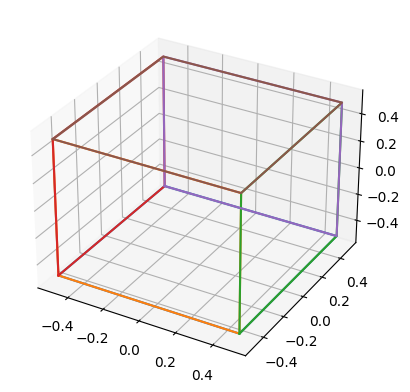

In [2]:
cube = platfam.get_shape("Cube")
cube.plot()

In [3]:
k(cube, 0.5)

coxeter.shapes.Polyhedron(vertices=[[-0.3968502629920499, 0.3968502629920499, -0.3968502629920499], [-0.3968502629920499, -0.3968502629920499, -0.3968502629920499], [-0.3968502629920499, -0.3968502629920499, 0.3968502629920499], [0.3968502629920499, -0.3968502629920499, -0.3968502629920499], [0.3968502629920499, 0.3968502629920499, -0.3968502629920499], [0.3968502629920499, -0.3968502629920499, 0.3968502629920499], [-0.3968502629920499, 0.3968502629920499, 0.3968502629920499], [0.3968502629920499, 0.3968502629920499, 0.3968502629920499], [-0.7937005259840997, 0.0, 0.0], [0.0, -0.7937005259840997, -0.0], [0.0, 0.0, -0.7937005259840997], [0.7937005259840997, 0.0, 0.0], [0.0, 0.7937005259840997, 0.0], [0.0, 0.0, 0.7937005259840997]], faces=[array([ 1, 10,  3,  9], dtype=int32), array([8, 1, 9, 2], dtype=int32), array([11,  5,  9,  3], dtype=int32), array([ 9,  5, 13,  2], dtype=int32), array([11,  3, 10,  4], dtype=int32), array([ 0, 10,  1,  8], dtype=int32), array([ 0, 12,  4, 10], dtyp

In [4]:
def generate_svg(poly, filename):
    def pad_arrays(arrays):
        # Find the length of the longest array
        max_length = max(len(arr) for arr in arrays)

        # Pad each array to the length of the longest array
        padded_array = [
            np.append(arr, [arr[0]] * (max_length - len(arr))) for arr in arrays
        ]
        return np.array(padded_array)

    view = pyrr.matrix44.create_look_at(
        eye=[50, 40, 120], target=[0, 0, 0], up=[0, 1, 0]
    )
    projection = pyrr.matrix44.create_perspective_projection(
        fovy=15, aspect=1, near=10, far=200
    )
    camera = svg3d.Camera(view, projection)

    style = dict(
        fill="white",
        fill_opacity="0.75",
        stroke="black",
        stroke_linejoin="round",
        stroke_width="0.005",
    )

    mesh = svg3d.Mesh(pad_arrays(poly.faces), style=style)
    view = svg3d.View(camera, svg3d.Scene([mesh]))
    svg3d.Engine([view]).render(filename)

In [5]:
def pad_arrays(arrays):
    # Find the length of the longest array
    max_length = max(len(arr) for arr in arrays)

    # Pad each array to the length of the longest array
    padded_array = [
        np.append(arr, [arr[0]] * (max_length - len(arr))) for arr in arrays
    ]
    return np.array(padded_array, dtype=int)

In [15]:
def generate_svg(arr, filename):
    view = pyrr.matrix44.create_look_at(
        eye=[50, 40, 120],
        target=[0, 0, 0],
        up=[0, 1, 0]
        # eye=[50, 40, 120], target=[0, 0, 0], up=[0, 1, 0]
    )
    projection = pyrr.matrix44.create_perspective_projection(
        # fovy=15, aspect=1, near=10, far=200
        fovy=3,
        aspect=1,
        near=10,
        far=200,
    )
    camera = svg3d.Camera(view, projection)

    style = dict(
        fill="#FFCB05",
        fill_opacity="1",
        stroke="black",
        stroke_linejoin="round",
        stroke_width="0.002",
    )

    mesh = svg3d.Mesh(arr, style=style)
    view = svg3d.View(camera, svg3d.Scene([mesh]))
    svg3d.Engine([view]).render(filename)


# generate_svg("octahedron.svg")

In [18]:
for kmt in np.linspace(0, 0.5, 5):
    poly = k(cube, kmt, normalize=True)
    generate_svg(poly.vertices[pad_arrays(poly.faces)], str(kmt) + "augcube.svg")